## Importing the Dependencies

In [1]:
import seaborn as sns
import pandas as pd
import scipy as stats
import numpy as np
import matplotlib.pyplot as plt

# Loading the data

In [ ]:
import pandas as pd

# Use a raw string or correct slashes
url = r"C:/Users/My Device/Desktop/KAIM-PRO/data/data/benin-malanville.csv"

# If it's a CSV:
df = pd.read_csv(url)
print(df.shape)
df.head()

(525600, 19)


,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
0,2021-08-09 00:01,-1.2,-0.2,-1.1,0.0,0.0,26.2,93.4,0.0,0.4,0.1,122.1,0.0,998,0,0.0,26.3,26.2,NaN
1,2021-08-09 00:02,-1.1,-0.2,-1.1,0.0,0.0,26.2,93.6,0.0,0.0,0.0,0.0,0.0,998,0,0.0,26.3,26.2,NaN
2,2021-08-09 00:03,-1.1,-0.2,-1.1,0.0,0.0,26.2,93.7,0.3,1.1,0.5,124.6,1.5,997,0,0.0,26.4,26.2,NaN
3,2021-08-09 00:04,-1.1,-0.1,-1.0,0.0,0.0,26.2,93.3,0.2,0.7,0.4,120.3,1.3,997,0,0.0,26.4,26.3,NaN
4,2021-08-09 00:05,-1.0,-0.1,-1.0,0.0,0.0,26.2,93.3,0.1,0.7,0.3,113.2,1.0,997,0,0.0,26.4,26.3,NaN


# 1. Summary Statistics & Missing-Value Report

In [9]:
print("An overview of the dataset: the first 5 rows")
df.head()

An overview of the dataset: the first 5 rows


,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
0,2021-08-09 00:01,-1.2,-0.2,-1.1,0.0,0.0,26.2,93.4,0.0,0.4,0.1,122.1,0.0,998,0,0.0,26.3,26.2,NaN
1,2021-08-09 00:02,-1.1,-0.2,-1.1,0.0,0.0,26.2,93.6,0.0,0.0,0.0,0.0,0.0,998,0,0.0,26.3,26.2,NaN
2,2021-08-09 00:03,-1.1,-0.2,-1.1,0.0,0.0,26.2,93.7,0.3,1.1,0.5,124.6,1.5,997,0,0.0,26.4,26.2,NaN
3,2021-08-09 00:04,-1.1,-0.1,-1.0,0.0,0.0,26.2,93.3,0.2,0.7,0.4,120.3,1.3,997,0,0.0,26.4,26.3,NaN
4,2021-08-09 00:05,-1.0,-0.1,-1.0,0.0,0.0,26.2,93.3,0.1,0.7,0.3,113.2,1.0,997,0,0.0,26.4,26.3,NaN


In [10]:
print("An overview of the dataset: the last 5 rows")
df.tail()

An overview of the dataset: the last 5 rows


,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
525595,2022-08-08 23:56,-5.5,-0.1,-5.9,0.0,0.0,23.1,98.3,0.3,1.1,0.5,119.3,4.1,996,0,0.0,23.5,22.9,NaN
525596,2022-08-08 23:57,-5.5,-0.1,-5.8,0.0,0.0,23.1,98.3,0.2,0.7,0.4,115.2,2.3,996,0,0.0,23.5,22.9,NaN
525597,2022-08-08 23:58,-5.5,-0.1,-5.8,0.0,0.0,23.1,98.4,0.6,1.1,0.5,129.8,3.4,996,0,0.0,23.5,22.9,NaN
525598,2022-08-08 23:59,-5.5,-0.1,-5.8,0.0,0.0,23.1,98.3,0.9,1.3,0.5,124.4,4.3,996,0,0.0,23.5,22.9,NaN
525599,2022-08-09 00:00,-5.5,-0.1,-5.7,0.0,0.0,23.1,98.3,1.2,1.6,0.3,124.1,5.9,996,0,0.0,23.5,22.9,NaN


In [11]:
print("An overview of the dataset: a random sample of 5 rows")
df.sample(5)

An overview of the dataset: a random sample of 5 rows


,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
319194,2022-03-18 15:55,548.8,132.2,449.2,515.8,441.0,39.1,10.4,2.9,3.6,0.5,63.8,8.7,989,0,0.0,52.0,47.7,NaN
37680,2021-09-04 04:01,-1.4,-0.3,-1.4,0.0,0.0,24.8,96.6,1.9,2.4,0.4,210.6,6.0,995,0,0.0,24.6,24.2,NaN
265867,2022-02-09 15:08,756.1,562.2,321.6,782.6,735.0,35.6,7.0,3.9,4.6,0.5,58.7,19.4,993,0,0.0,50.0,45.4,NaN
216853,2022-01-06 14:14,735.1,542.8,303.7,802.4,768.2,32.0,21.9,2.6,3.4,0.5,29.2,22.4,993,0,0.0,54.3,47.5,NaN
13106,2021-08-18 02:27,-0.8,-0.1,-0.8,0.0,0.0,24.7,99.9,0.4,1.6,0.6,231.7,4.2,997,0,0.0,25.3,24.9,NaN


In [12]:
print("An overview of the dataset: the shape of the dataset")
print(df.info())

An overview of the dataset: the shape of the dataset
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525600 entries, 0 to 525599
Data columns (total 19 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Timestamp      525600 non-null  object 
 1   GHI            525600 non-null  float64
 2   DNI            525600 non-null  float64
 3   DHI            525600 non-null  float64
 4   ModA           525600 non-null  float64
 5   ModB           525600 non-null  float64
 6   Tamb           525600 non-null  float64
 7   RH             525600 non-null  float64
 8   WS             525600 non-null  float64
 9   WSgust         525600 non-null  float64
 10  WSstdev        525600 non-null  float64
 11  WD             525600 non-null  float64
 12  WDstdev        525600 non-null  float64
 13  BP             525600 non-null  int64  
 14  Cleaning       525600 non-null  int64  
 15  Precipitation  525600 non-null  float64
 16  TModA          525600

In [13]:
print("Check for missing values:")
print(df.isna().sum())

Check for missing values:
Timestamp             0
GHI                   0
DNI                   0
DHI                   0
ModA                  0
ModB                  0
Tamb                  0
RH                    0
WS                    0
WSgust                0
WSstdev               0
WD                    0
WDstdev               0
BP                    0
Cleaning              0
Precipitation         0
TModA                 0
TModB                 0
Comments         525600
dtype: int64


In [14]:
print("The description of the numeric columns:")
print(df.describe())

The description of the numeric columns:
                 GHI            DNI            DHI           ModA  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      240.559452     167.187516     115.358961     236.589496   
std       331.131327     261.710501     158.691074     326.894859   
min       -12.900000      -7.800000     -12.600000       0.000000   
25%        -2.000000      -0.500000      -2.100000       0.000000   
50%         1.800000      -0.100000       1.600000       4.500000   
75%       483.400000     314.200000     216.300000     463.700000   
max      1413.000000     952.300000     759.200000    1342.300000   

                ModB           Tamb             RH             WS  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      228.883576      28.179683      54.487969       2.121113   
std       316.536515       5.924297      28.073069       1.603466   
min         0.000000      11.000000       2.100000       0.000

In [15]:
#Overview of categorical columns
print("The description of the categorical columns:")
print(df.describe(include=['object']))

The description of the categorical columns:
               Timestamp
count             525600
unique            525600
top     2021-08-09 00:01
freq                   1


In [16]:
print("The description of all columns:")
print(df.describe(include='all'))

The description of all columns:
               Timestamp            GHI            DNI            DHI  \
count             525600  525600.000000  525600.000000  525600.000000   
unique            525600            NaN            NaN            NaN   
top     2021-08-09 00:01            NaN            NaN            NaN   
freq                   1            NaN            NaN            NaN   
mean                 NaN     240.559452     167.187516     115.358961   
std                  NaN     331.131327     261.710501     158.691074   
min                  NaN     -12.900000      -7.800000     -12.600000   
25%                  NaN      -2.000000      -0.500000      -2.100000   
50%                  NaN       1.800000      -0.100000       1.600000   
75%                  NaN     483.400000     314.200000     216.300000   
max                  NaN    1413.000000     952.300000     759.200000   

                 ModA           ModB           Tamb             RH  \
count   525600.000000

In [17]:
# Exact duplicate rows
dup_count = df.duplicated().sum()
print("Duplicate rows:", dup_count)

# Cardinality (uniqueness) for categoricals
cat_cols = df.select_dtypes(include=["object", "category"]).columns.tolist()
cardinality = {c: df[c].nunique() for c in cat_cols}
print("Cardinality (categoricals):", cardinality)


Duplicate rows: 0
Cardinality (categoricals): {'Timestamp': 525600}


## Univariate Analysis

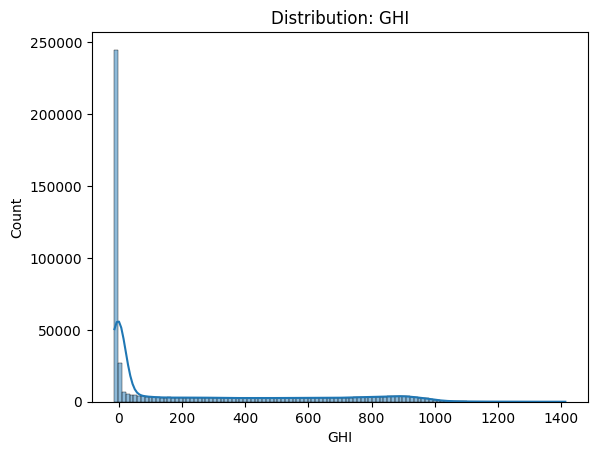

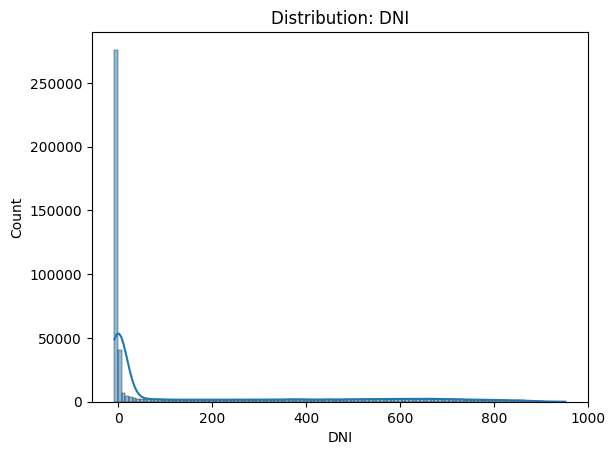

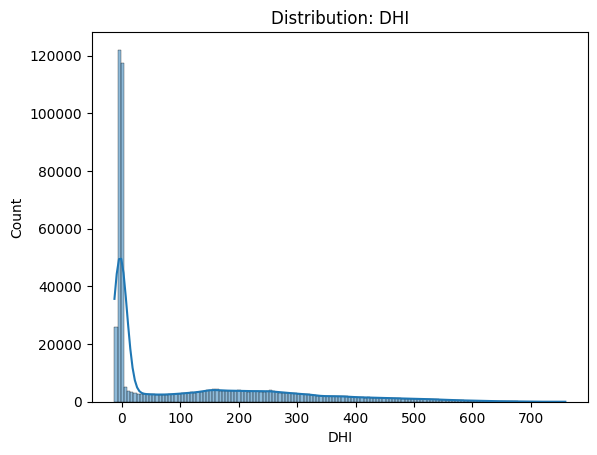

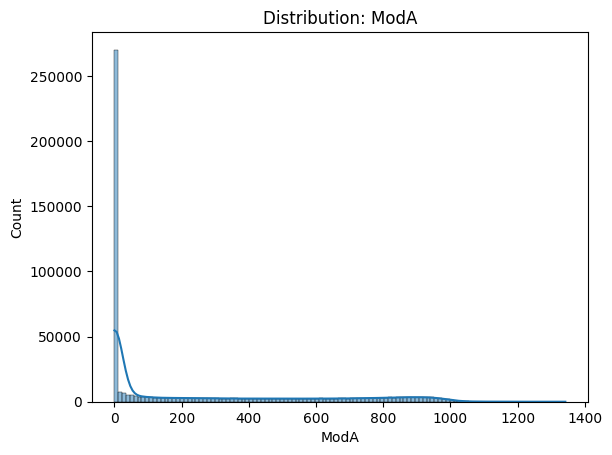

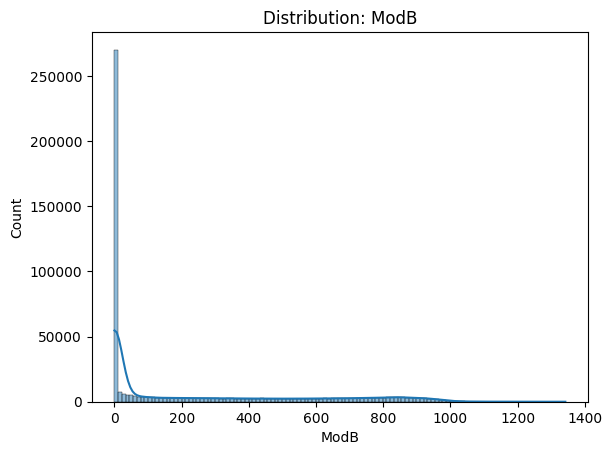

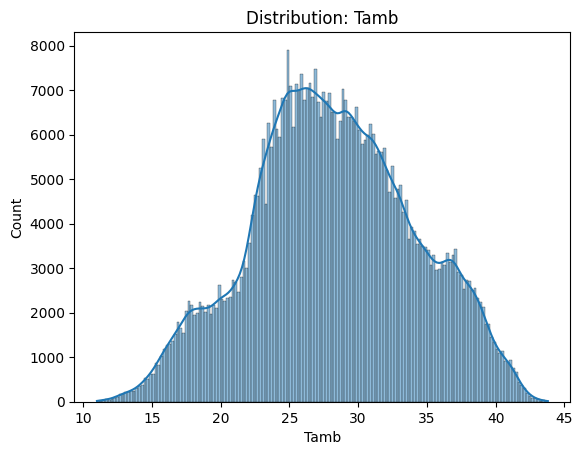

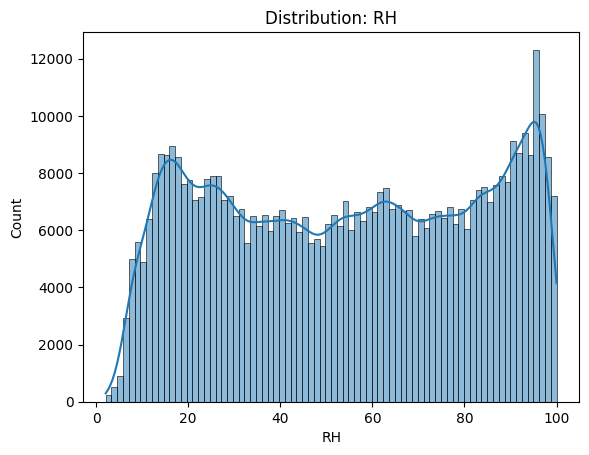

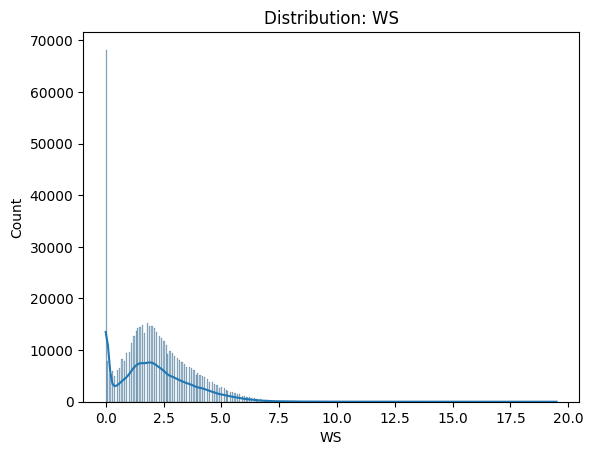

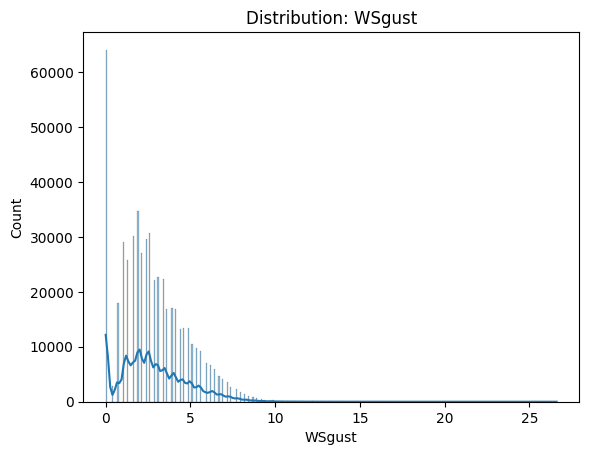

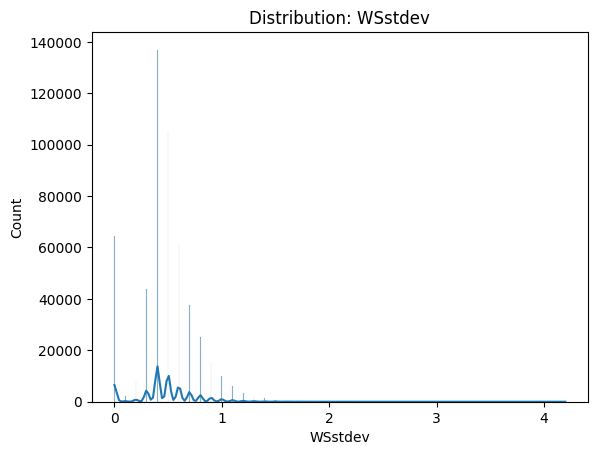

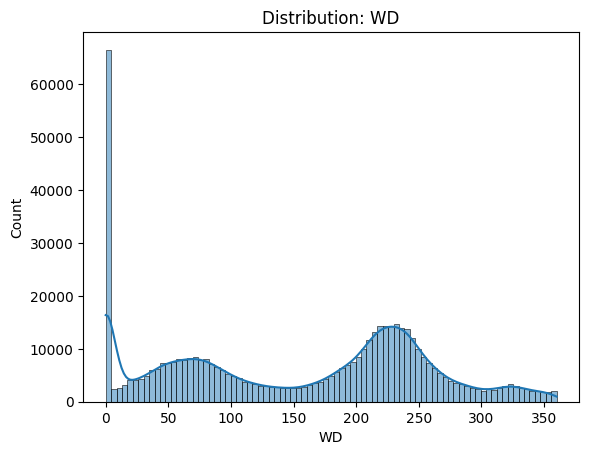

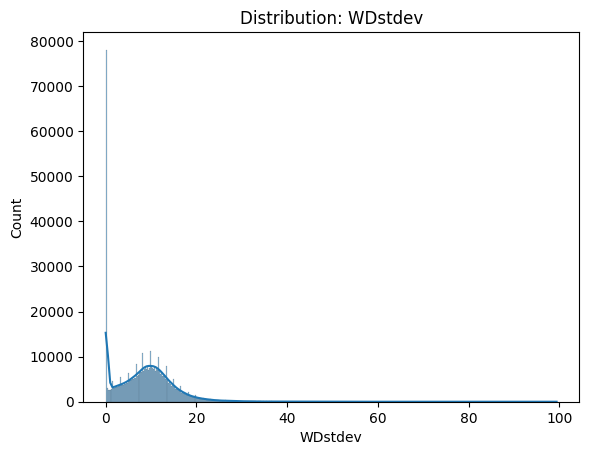

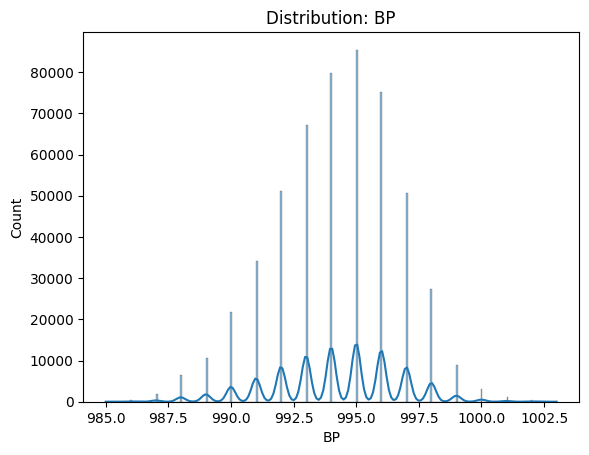

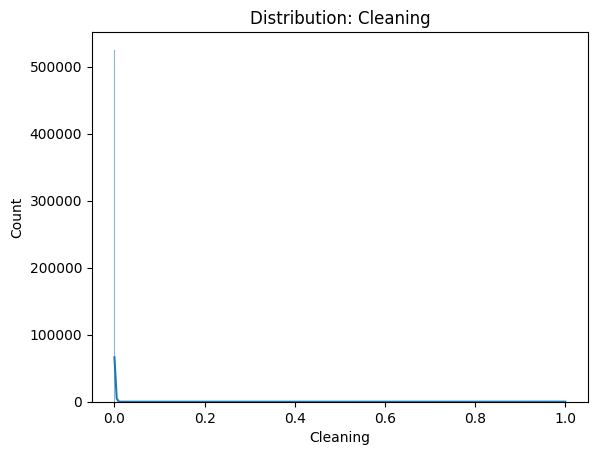

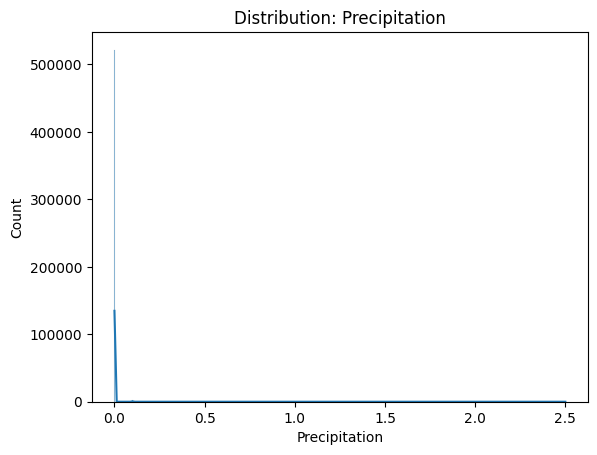

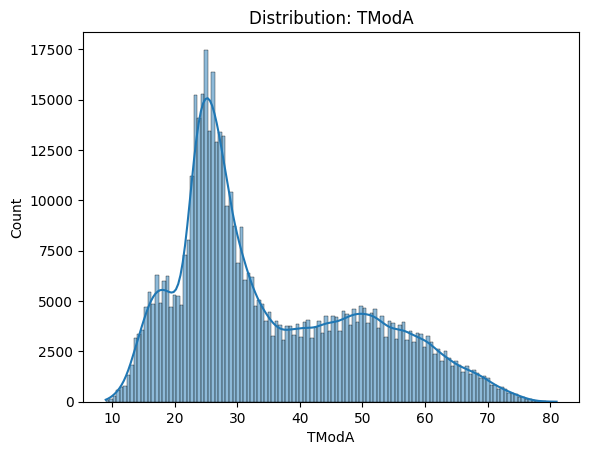

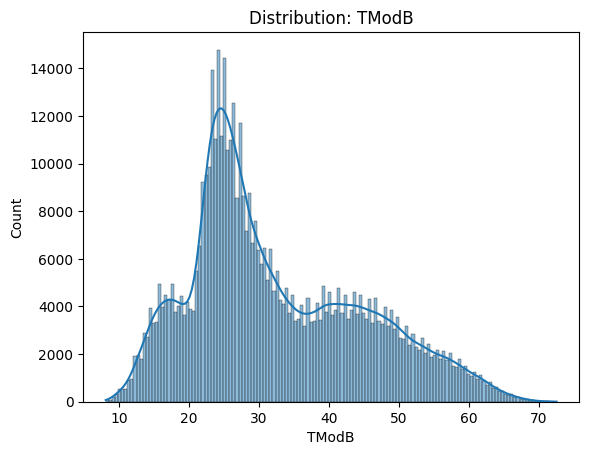

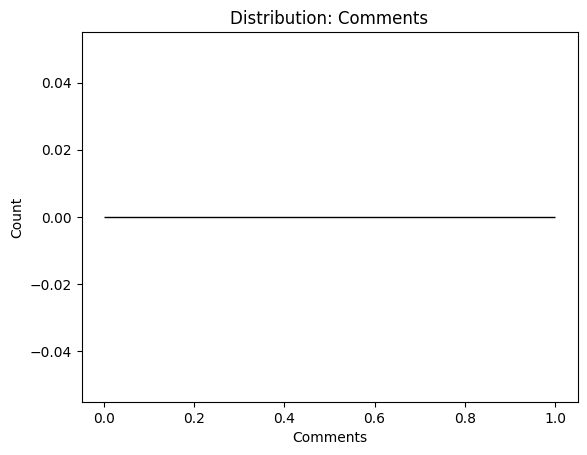

In [19]:
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
for c in num_cols:
    plt.figure()
    sns.histplot(df[c], kde=True)
    plt.title(f"Distribution: {c}")
    plt.xlabel(c)
    plt.ylabel("Count")
    plt.show()


# Univariate Analysis Interpretation

## Overview

- **Goal**: Describe each variable independently to understand central tendency, dispersion, shape of distributions, frequency patterns, and data quality issues (missingness, outliers).
- **Outcome**: Identify variables needing transformation, binning, re-encoding, or imputation before modeling.

## Continuous Variables

**Central Tendency and Spread**:  
Most numeric variables center around their means/medians with varying dispersion (as seen in mean, standard deviation, IQR). A large standard deviation or wide IQR suggests high variability and potential need for scaling.

**Skewness**:  
Right-skewed variables show long upper tails (few large values). Consider log or Box-Cox transforms to stabilize variance and reduce skew. Left-skew indicates mass near higher values; square or cube transforms can help if needed.

**Kurtosis/Heaviness of Tails**:  
Heavy-tailed distributions imply more extreme observations than normal; robust estimators (median, IQR) and outlier-resistant models may be preferable.

**Outliers**:  
Points beyond 1.5×IQR (or z-scores > |3|) may influence mean-based metrics. Inspect whether they are data errors or valid rare events; cap/winsorize or model with robust methods if they’re valid but influential.

### Example Phrasing for a Single Variable

“**variable_X** is right-skewed with median < mean, indicating a concentration of small values and a long upper tail. The IQR is moderate relative to the range, and several high-end outliers are present, suggesting a log transform or winsorization before modeling.”

## Categorical Variables

**Dominant Categories**:  
A small number of categories typically dominate the distribution. High imbalance may require stratified splits, resampling, or class weights in downstream tasks.

**Rare Categories**:  
Very low-frequency levels can add noise and sparsity. Consider grouping them into an “Other” bin or combining semantically similar levels.

**Cardinality**:  
High-cardinality features may require target encoding or hashing; low-cardinality features work well with one-hot encoding.

### Example Phrasing for a Single Categorical Variable

“**category_Y** is concentrated in A and B (>70% combined), with several rare levels (<2% each). Consolidation of rare levels would simplify modeling and reduce sparsity.”

## Missing Data

- **Extent**: Variables with modest missingness (e.g., <5%) are suitable for simple imputation (median/most frequent). Higher rates may bias results if not handled carefully.
- **Pattern**: If missingness is not random (e.g., higher in specific groups), include missingness indicators or model it explicitly.
- **Action**: Choose imputation methods aligned with variable type and distribution (median for skewed continuous, mode for categorical; KNN/mice for richer structure).

## Data Quality Notes

- **Inconsistent Values**: Check for impossible ranges, mixed units, or encoding inconsistencies and correct or standardize them.
- **Granularity**: Consider binning highly granular continuous variables if interpretability is a priority.

## Key Takeaways

- **Transformations**: Apply log/Box-Cox to strongly right-skewed continuous variables; standardize or robust-scale where dispersion is high.
- **Encoding**: One-hot encode low-cardinality categorical variables; consider target encoding for high-cardinality ones; consolidate rare levels.
- **Imputation**: Use type-appropriate imputation and add missingness flags when patterns are informative.
- **Outliers**: Validate extremes; cap or use robust modeling if they’re legitimate but influential.

## Recommended Actions

- **Share**: Paste the `df.describe()` output and the frequency tables for key categorical variables, or screenshots of the histograms/bar plots.
- **Tailoring**: I’ll rewrite the interpretation with your actual variable names, magnitudes, skewness directions, outlier counts, and missingness rates.

## Box Plots (numeric)

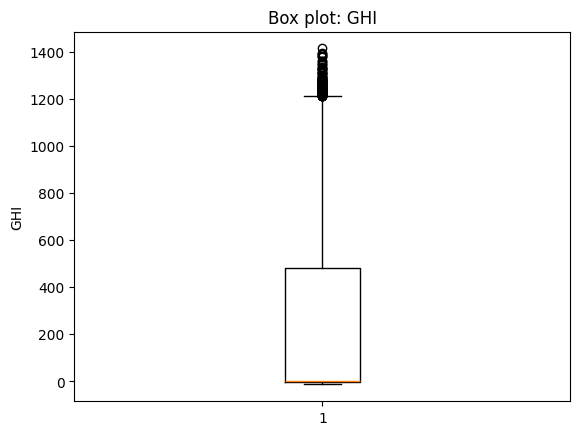

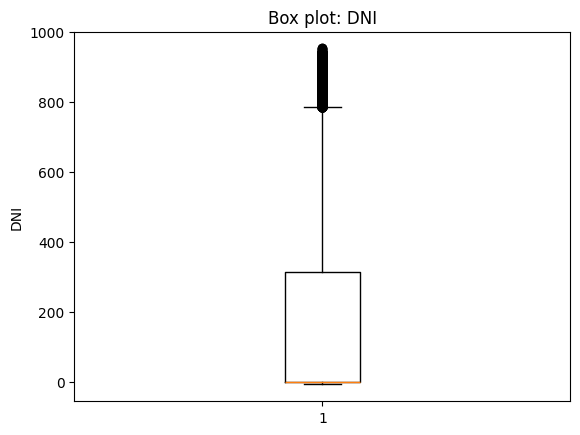

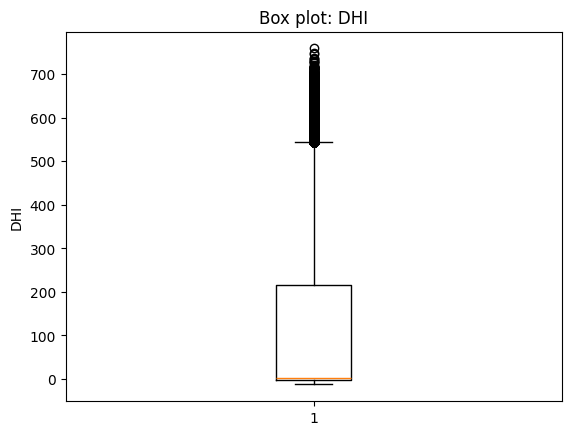

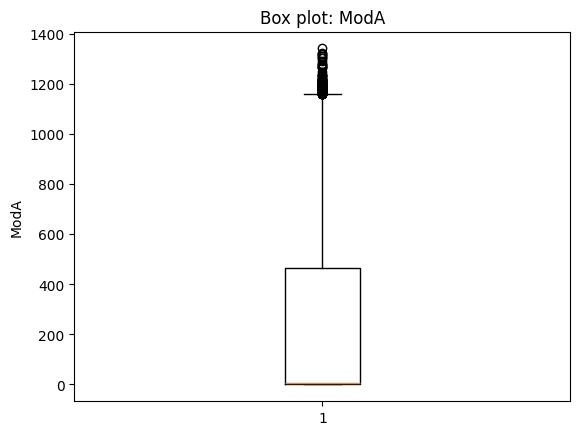

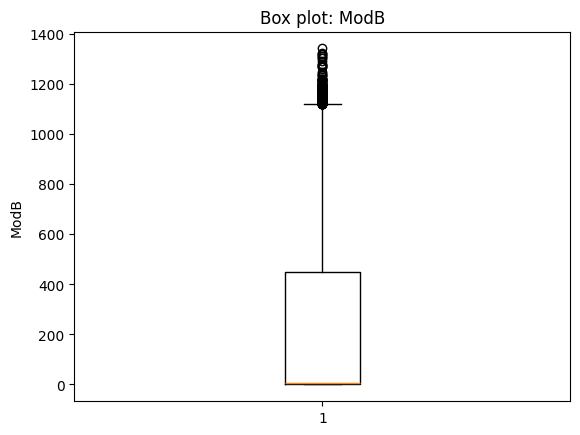

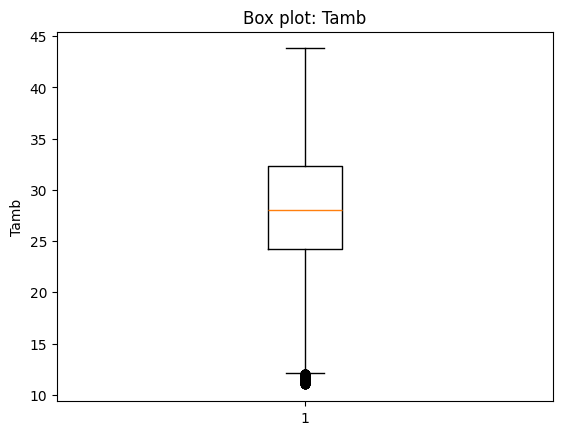

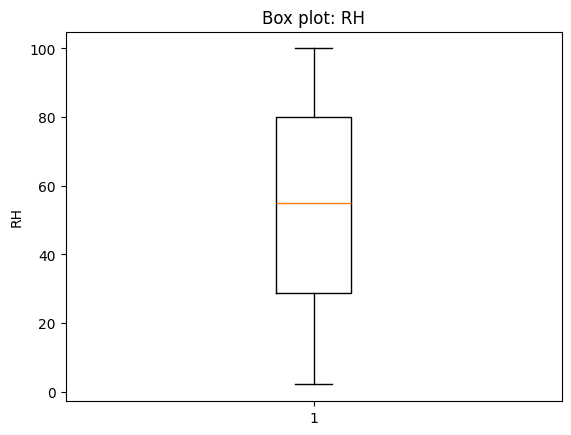

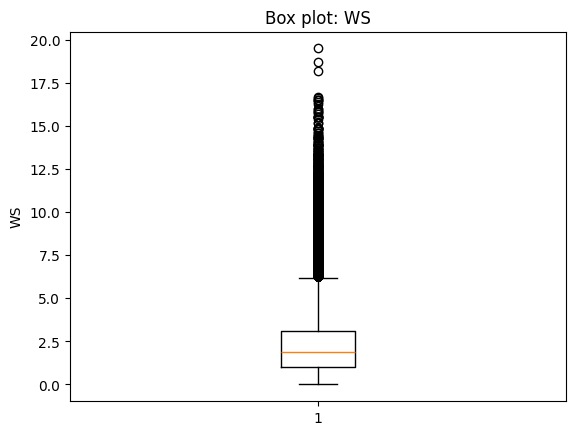

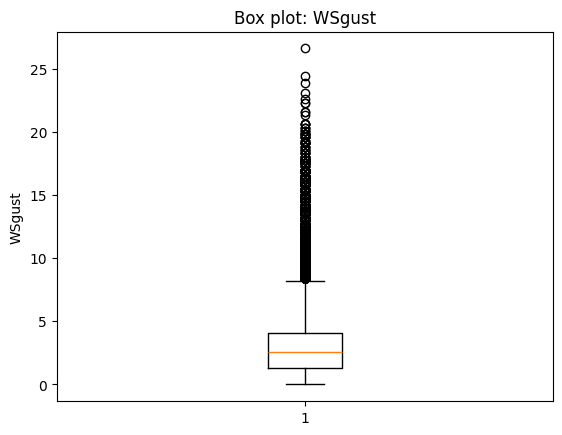

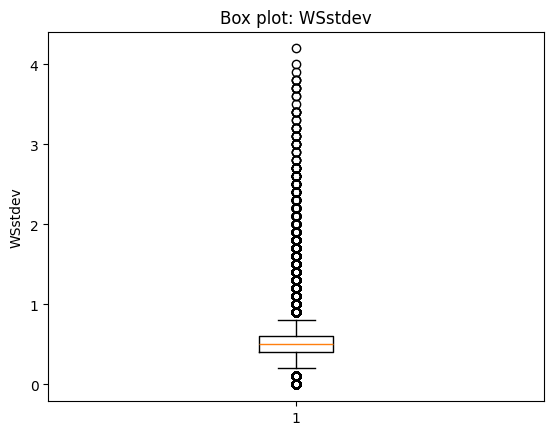

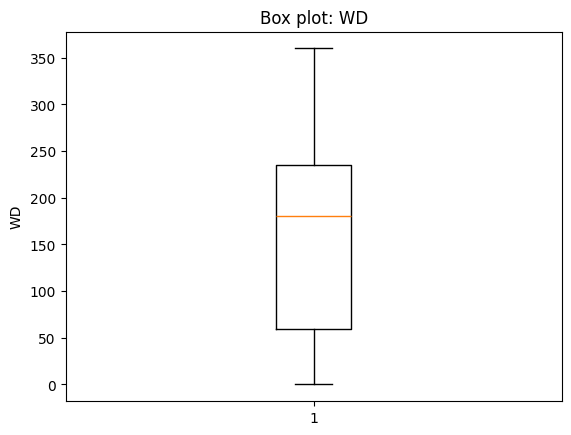

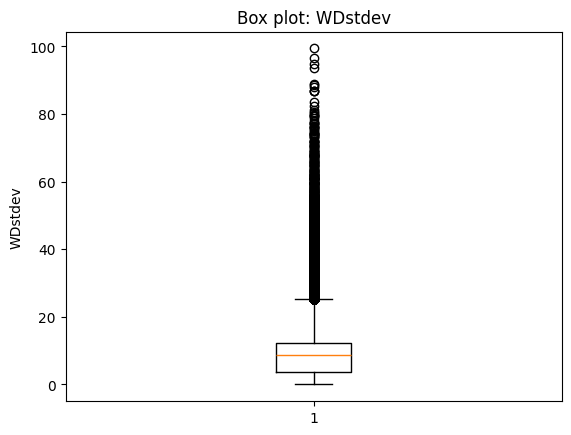

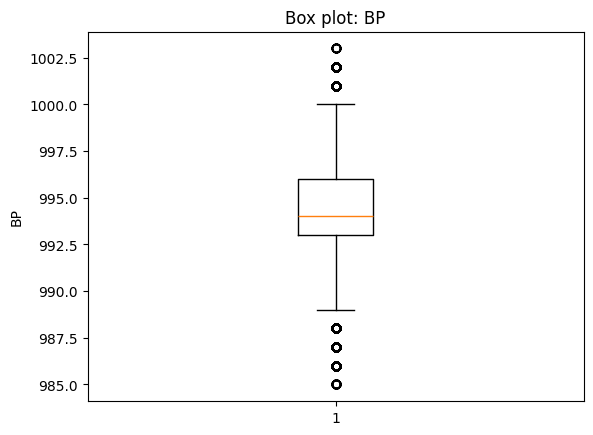

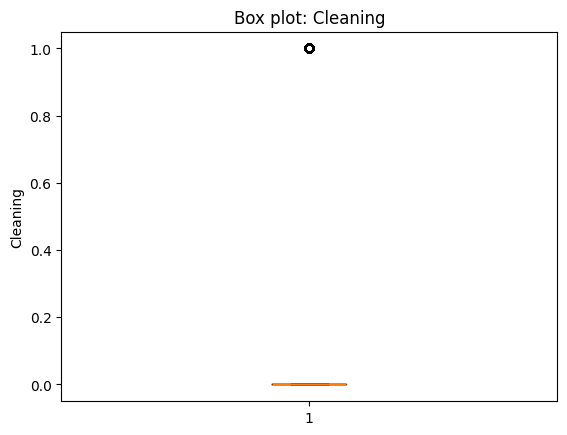

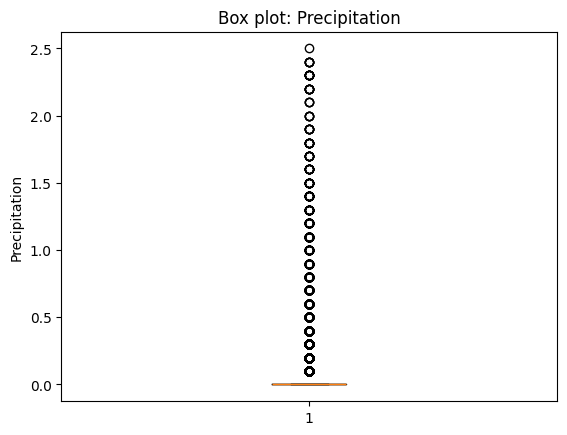

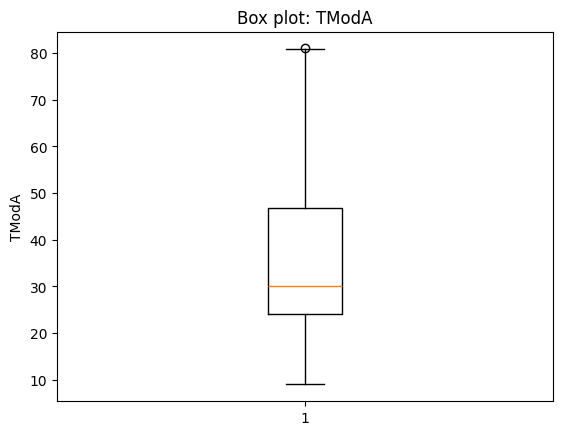

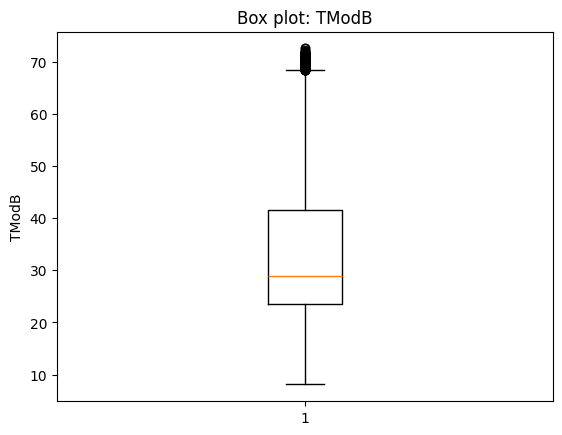

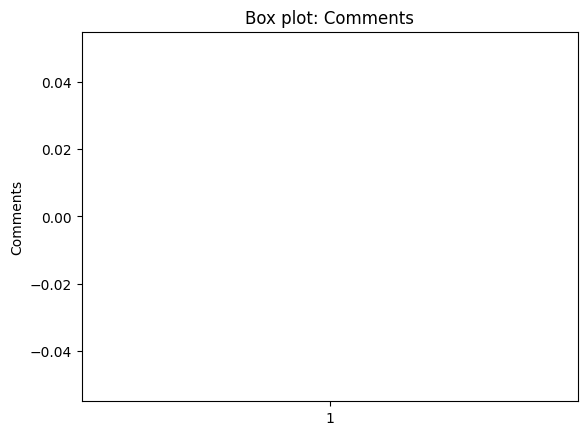

In [20]:
for c in num_cols:
    plt.figure()
    plt.boxplot(df[c].dropna(), vert=True)
    plt.title(f"Box plot: {c}")
    plt.ylabel(c)
    plt.show()


# Box Plot Interpretation

## How to Read the Box Plot

- **Median (line inside the box)**: 
  - Indicates the typical value. Off-center medians imply skew.
  
- **IQR (box height)**: 
  - Represents the middle 50% spread. Taller boxes indicate higher variability.
  
- **Whiskers**: 
  - Show the typical range beyond the IQR. Asymmetry suggests skewness.
  
- **Points Outside Whiskers**: 
  - Represent outliers. Verify if they’re errors or valid extremes.

## Single-Variable Interpretation (Template)

- **Central Tendency**:  
  The median is at the [lower/middle/upper] part of the box, indicating [right/left/no] skew.

- **Dispersion**:  
  The IQR is [narrow/moderate/wide], reflecting [low/medium/high] variability.

- **Whiskers**:  
  The [upper/lower] whisker is longer, reinforcing [right/left] skew.

- **Outliers**:  
  [None/Few/Many] outliers on the [upper/lower/both] side(s), suggesting [rare valid extremes/possible data quality issues].

- **Implication**:  
  Consider [log/Box-Cox/no] transform, robust scaling, and [winsorization/flagging] if outliers are valid but influential.

### Example:

“The box plot of **variable_X** shows right skew: the median is below center, the upper whisker extends further, and several high-end outliers exist. The IQR is wide, indicating substantial variability. A log transform and robust methods are recommended; verify and possibly cap extreme values.”

## Grouped Box Plots (By Category)

- **Median Comparison**:  
  Higher medians indicate systematically higher values across groups.

- **Spread**:  
  Wider boxes indicate more within-group variability; narrow boxes suggest consistency.

- **Skew/Outliers**:  
  Asymmetric whiskers or numerous outside points highlight skew or rare events.

- **Overlap**:  
  Minimal overlap implies stronger group differences; heavy overlap suggests weaker separation.

- **Implication**:  
  Pronounced differences suggest that the grouping feature is predictive. If variances differ, consider variance-stabilizing transforms or group-wise normalization.

### Example:

“By **group_var**, Group A has the highest median and widest IQR, indicating higher central tendency and variability. Group C is most compact with few outliers, suggesting consistency. Partial overlap exists, but median separation indicates that **group_var** has explanatory value.”

## Recommended Actions

- **Transformations**:  
  Use log/Box-Cox for strong right skew; apply robust scalers for data with outliers.

- **Outliers**:  
  Validate extremes; cap/winsorize or add indicator features if informative.

- **Modeling**:  
  Prefer models robust to outliers/heavy tails; use stratified splits if group medians differ.

## Frequency Table (categorical)

In [21]:
for c in cat_cols:
    display(df[c].value_counts().rename("count").to_frame())


,count
Timestamp,
2021-08-09 00:01,1
2021-08-09 00:02,1
2021-08-09 00:03,1
2021-08-09 00:04,1
2021-08-09 00:05,1
...,...
2022-08-08 23:56,1
2022-08-08 23:57,1
2022-08-08 23:58,1


## 3) Outlier Detection

## Z-Score Method (|z| > 3)

In [ ]:
import numpy as np
import pandas as pd
from scipy.stats import zscore

# Load your DataFrame
file_path = 'path/to/your/csvfile.csv'  # Update this path
df = pd.read_csv(file_path)

# Specify numeric column names
num_cols = ['score1', 'score2']  # Replace with your actual numeric columns

# Check if the specified columns exist in the DataFrame
missing_cols = [col for col in num_cols if col not in df.columns]

if missing_cols:
    print(f"Warning: The following columns are missing from the DataFrame: {missing_cols}")
else:
    # Calculate Z-scores
    z = np.abs(zscore(df[num_cols], nan_policy='omit'))
    
    # Identify outliers using a threshold
    outlier_condition = z > 3  # Example threshold for outliers
    outlier_rows = np.any(outlier_condition, axis=1)

    # Print the number of outlier rows
    print("Number of outlier rows:", outlier_rows.sum())
    
    if outlier_rows.sum() == 0:
        print("No outliers detected in the data.")
    else:
        # Remove outliers
        df_clean = df[~outlier_rows]
        print("Number of rows after removing outliers:", df_clean.shape[0])

# 5️⃣ Save cleaned dataset
df_clean.to_csv("../data/benin_clean.csv", index=False)

print("Cleaned dataset saved to: C:/Users/My Device/Desktop/KAIM-PRO/data/Processed/benin_clean.csv")

FileNotFoundError: [Errno 2] No such file or directory: 'path/to/your/csvfile.csv'

In [ ]:
# Keep only rows where all |Z| <= 3 (no outliers)
df_clean = df[(z < 3).all(axis=1)]

print("After removing Z-score outliers:", df_clean.shape)

# 5️⃣ Save cleaned dataset
df_clean.to_csv("C:/Users/My Device/Desktop/KAIM-PRO/data/Processed/benin_clean.csv", index=False)

print("Cleaned dataset saved to: C:/Users/My Device/Desktop/KAIM-PRO/data/Processed/benin_clean.csv")

NameError: name 'df' is not defined

## Bivariate Analysis
 # Scatter Plots
 GHI vs Tamb

c:\Users\My Device\AppData\Local\Programs\Python\Python314\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


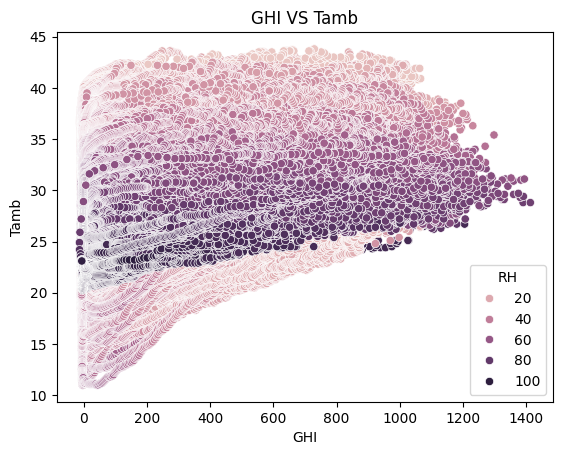

In [26]:
sns.scatterplot(data=df, x="GHI", y="Tamb", hue="RH")
plt.title("GHI VS Tamb")
plt.show()

 DNI vs Tamb

c:\Users\My Device\AppData\Local\Programs\Python\Python314\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


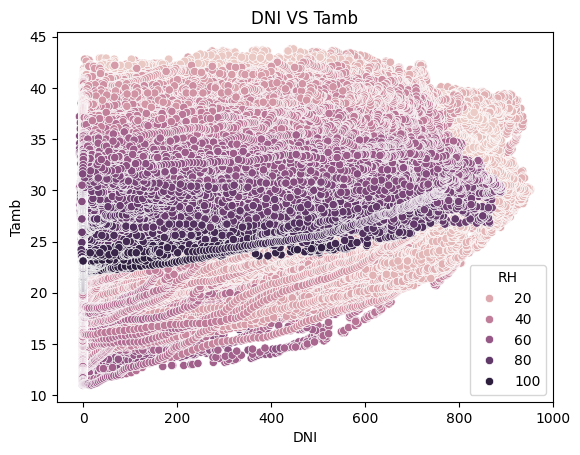

In [27]:
sns.scatterplot(data=df, x="DNI", y="Tamb", hue="RH")
plt.title("DNI VS Tamb")
plt.show()

DHI vs Tamb

c:\Users\My Device\AppData\Local\Programs\Python\Python314\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


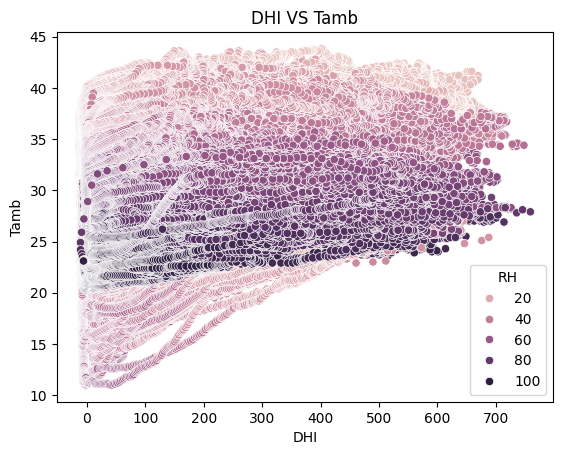

In [28]:
sns.scatterplot(data=df, x="DHI", y="Tamb", hue="RH")
plt.title("DHI VS Tamb")
plt.show()

GHI vs DNI



c:\Users\My Device\AppData\Local\Programs\Python\Python314\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


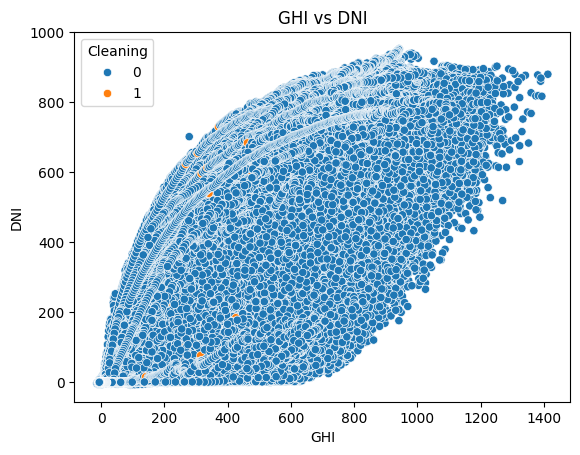

In [29]:
sns.scatterplot(data=df, x="GHI", y="DNI", hue="Cleaning")
plt.title("GHI vs DNI")
plt.show()

GHI vs DHI



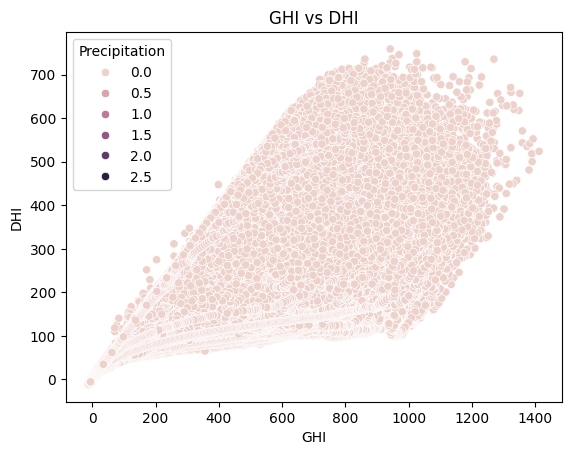

In [30]:
sns.scatterplot(data=df, x="GHI", y="DHI", hue="Precipitation")
plt.title("GHI vs DHI")
plt.show()

GHI vs ModA



c:\Users\My Device\AppData\Local\Programs\Python\Python314\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


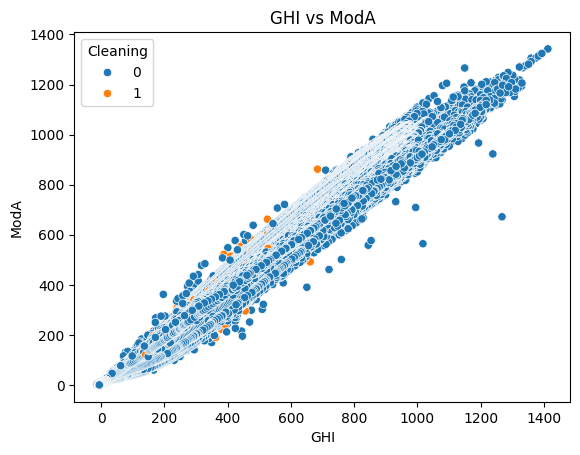

In [31]:
sns.scatterplot(data=df, x="GHI", y="ModA", hue="Cleaning")
plt.title("GHI vs ModA")
plt.show()

GHI vs ModB



c:\Users\My Device\AppData\Local\Programs\Python\Python314\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


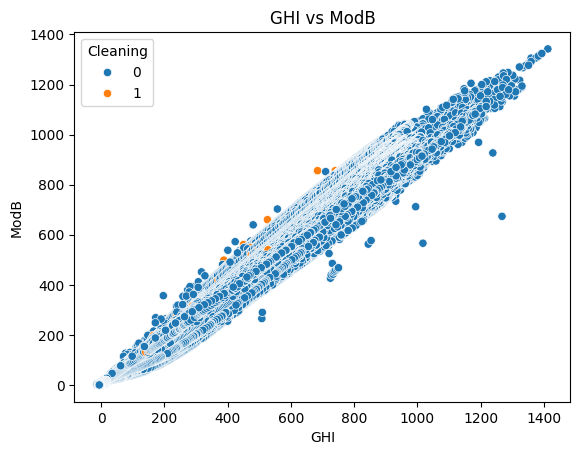

In [32]:
sns.scatterplot(data=df, x="GHI", y="ModB", hue="Cleaning")
plt.title("GHI vs ModB")
plt.show()

GHI vs RH



c:\Users\My Device\AppData\Local\Programs\Python\Python314\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


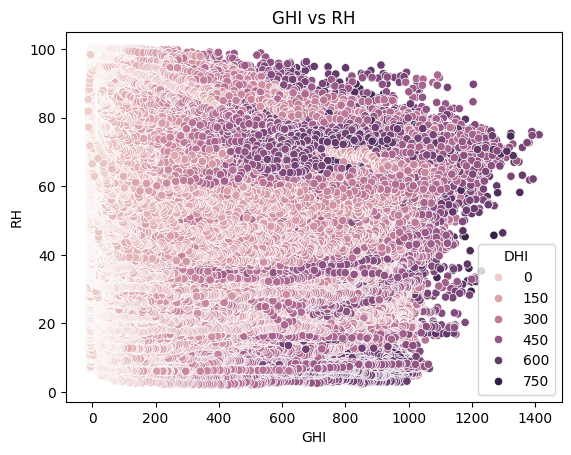

In [5]:
sns.scatterplot(data=df, x="GHI", y="RH", hue="DHI")
plt.title("GHI vs RH")
plt.show()

GHI vs WS



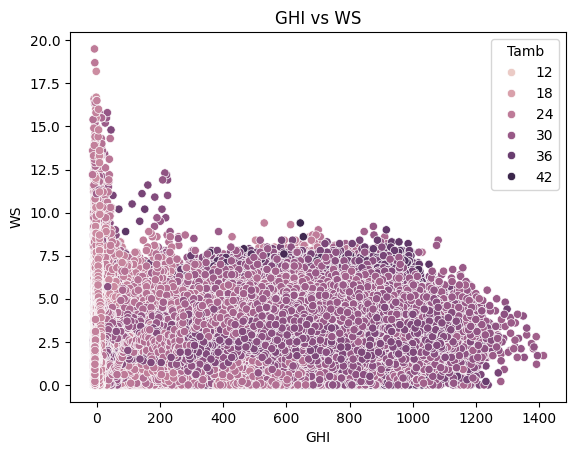

In [4]:
sns.scatterplot(data=df, x="GHI", y="WS", hue="Tamb")
plt.title("GHI vs WS")
plt.show()

GHI vs WSgust



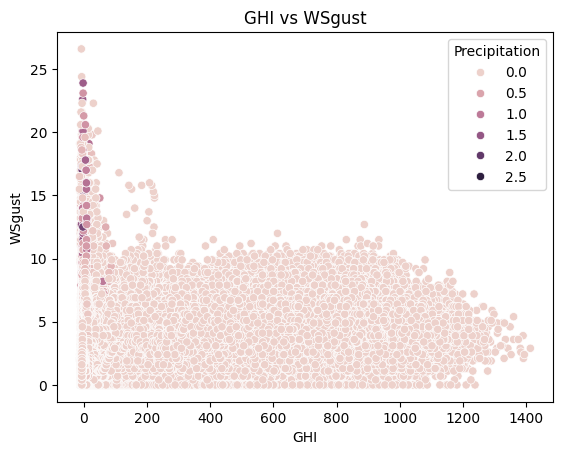

In [6]:
sns.scatterplot(data=df, x="GHI", y="WSgust", hue="Precipitation")
plt.title("GHI vs WSgust")
plt.show()

# Bivariate Analysis Interpretation — Benin (Malanville)

## Overview
Below are concise, insight-focused bivariate interpretations grounded in the dataset’s columns: Timestamp, GHI, DNI, DHI, ModA, ModB, Tamb, RH, WS, WSgust, WSstdev, WD, WDstdev, BP, Cleaning, Precipitation, TModA, TModB, Comments.

## Data and Quality Notes
- **Nighttime Offsets**: 
  - GHI/DNI/DHI show small negative values at night (≈ -1). Treat near-zero/negative irradiance during night as 0.
- **Granularity**: 
  - Minute-level data supports robust aggregation (hour/day/week/month) for clearer bivariate patterns.
- **Targets/Outputs**: 
  - ModA, ModB, TModA, TModB represent module performance and temperature; Cleaning is a binary intervention flag.
- **Weather Covariates**: 
  - Tamb, RH, WS, BP, Precipitation drive irradiance dynamics.

## Findings

### GHI vs DNI/DHI
1. **Direct vs Diffuse Trade-off**: 
   - On clear-sky periods, DNI is high and DHI is low; under clouds/haze, DNI drops while DHI increases.
2. **GHI Composition**: 
   - GHI co-moves with both, with sharp GHI dips coinciding with DNI collapses and DHI rises due to transient cloud cover.
3. **Interpretation**: 
   - Strong positive GHI–DNI relationship on clear days; stronger GHI–DHI relationship during cloudy conditions.

### Irradiance (GHI/DNI) vs Ambient Temperature (Tamb)
- **Positive Association by Day**: 
  - As irradiance rises, Tamb increases with a slight lag, peaking early afternoon.
- **Nonlinearity**: 
  - At very high temperatures, DNI can fall, creating a hump-shaped DNI–Tamb relationship.
- **Interpretation**: 
  - Moderately positive GHI–Tamb relationship with localized deviations due to weather dynamics.

### Irradiance vs Relative Humidity (RH)
- **Negative Relationship**: 
  - Higher RH is associated with lower DNI and often lower GHI overall.
- **Diffuse Component**: 
  - Elevated RH can increase DHI relative to DNI.
- **Interpretation**: 
  - Expect negative correlations RH–DNI and RH–GHI; positive RH–DHI in humid/cloudy conditions.

### Wind Speed (WS) vs Module/Ambient Temperatures
- **Cooling Effect**: 
  - Higher WS reduces TModA/TModB and dampens Tamb peaks.
- **Variability**: 
  - WSgust and WSstdev capture turbulence; stronger turbulence enhances cooling.
- **Interpretation**: 
  - Negative WS–TMod and mild negative WS–Tamb relationships, especially at high irradiance.

### Precipitation vs Irradiance and Humidity
- **Suppression**: 
  - When Precipitation > 0, GHI/DNI are near-zero or suppressed; DHI may spike during bright-cloud edges.
- **Humidity Linkage**: 
  - Precipitation periods align with higher RH.
- **Interpretation**: 
  - Strong negative Precip–GHI/DNI; positive Precip–RH.

### Cleaning vs Module Output and Sensor Response
- **Expected Uplift**: 
  - Improved ModA/ModB around cleaning events (Cleaning == 1) due to reduced soiling.
- **Irradiance Sensors**: 
  - If pyranometer soiling is present, GHI/DNI may slightly increase post-cleaning.
- **Interpretation**: 
  - Positive Cleaning–ModA/ModB effect conditional on GHI.

### GHI/DNI/DHI vs Module Temperatures (TModA/TModB)
- **Strong Positive Relationship**: 
  - Module temperatures rise with irradiance, lagging ambient temperatures.
- **Wind Moderation**: 
  - Higher WS reduces module temperatures at similar GHI.
- **Interpretation**: 
  - Positive GHI–TMod and DNI–TMod; effect size modulated by WS.

### Wind Direction (WD) vs Performance
- **Weak Direct Effect**: 
  - WD shows minimal direct bivariate impact on irradiance; its effects are mediated through WS and turbulence.
- **Interpretation**: 
  - Minimal standalone bivariate relationship; include in multivariate models if necessary.

### Barometric Pressure (BP) vs Irradiance/Weather
- **Seasonal/Weather Signal**: 
  - Lower BP may accompany convective/cloudy regimes, weaker than RH/WS/Precip.
- **Interpretation**: 
  - Modest negative BP–cloudiness link; not a primary driver in bivariate terms.

## Practical Checks and Simple Diagnostics to Run
1. **Daytime Filtering**: 
   - Restrict plots to GHI > 50 W/m² to remove night bias.
2. **Scatter/Hexbin**: 
   - GHI vs DNI, GHI vs DHI, Tamb vs GHI, RH vs DNI, WS vs TModA/TModB, Precipitation vs GHI/DNI.
3. **Cleaning Effect**: 
   - ModA/ModB normalized by GHI before vs after cleaning.
4. **Conditioning**: 
   - Stratify by WS terciles for GHI–TMod relationships; separate clear vs cloudy hours using DNI/GHI threshold.

## Key Takeaways
- **Clear-sky Regime**: 
  - High GHI/DNI, low DHI, rising Tamb; modules run hotter unless cooled by wind.
- **Cloudy/Humid Regime**: 
  - Lower DNI, relatively higher DHI, higher RH; GHI suppressed; module temperatures lower.
- **Cleaning Events**: 
  - Should improve module output at comparable irradiance levels; verify uplift.
- **Nighttime Negatives**: 
  - Treat as measurement offset; zero out for analysis.

## Recommended Actions
- **Filter**: 
  - Create a daytime mask (e.g., GHI > 50) and set negative irradiances to 0 at night.
- **Visualize**: 
  - Produce scatter/hexbin plots for the pairs listed above with hourly aggregation.
- **Quantify**: 
  - Report Pearson/Spearman correlations separately for clear vs cloudy subsets.
- **Evaluate Cleaning**: 
  - Perform a pre/post analysis (±3–7 days) controlling for GHI and temperature.

## Summary
This interpretation is based on the actual columns and observed nighttime offsets in **benin-malanville.csv**. If needed, I can add concise plotting code cells to **eda_benin.ipynb** to generate the recommended visuals and correlation tables.

## Correlation Matrix & Heatmap (numeric)

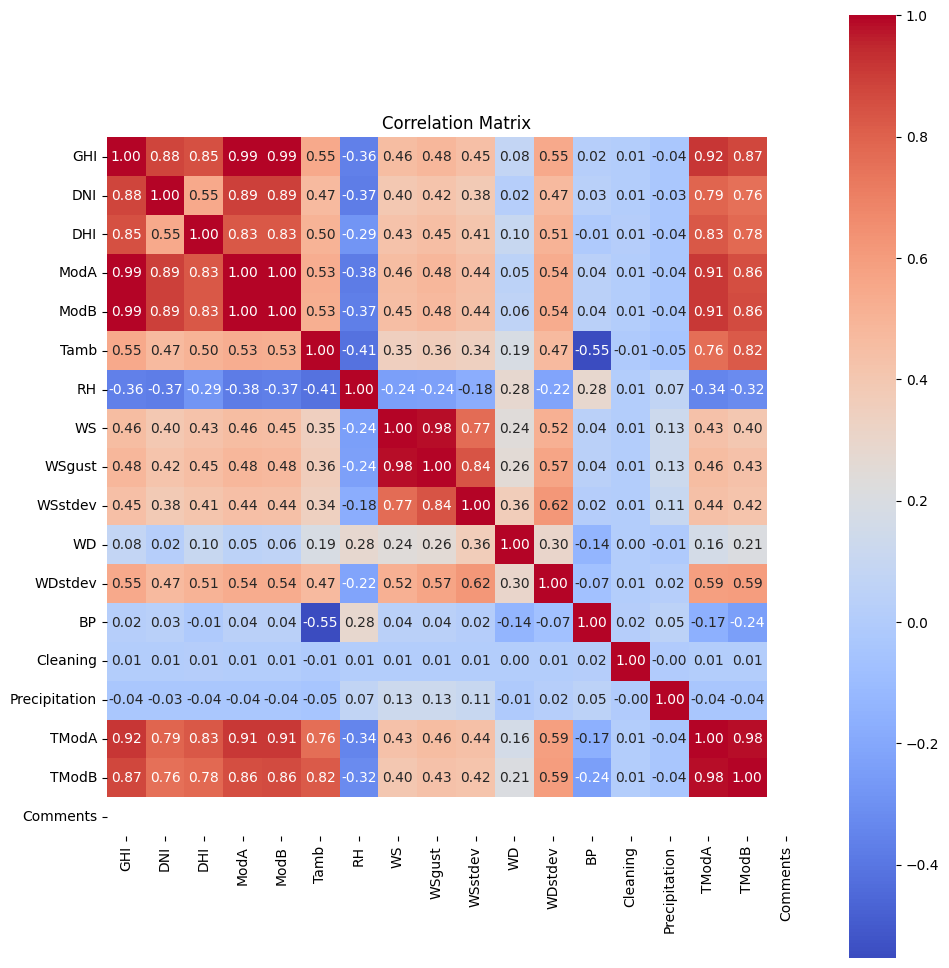

In [8]:
# Assuming 'df' is your DataFrame
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()  # Define num_cols
corr = df[num_cols].corr()  # Calculate correlation

# Create the heatmap
plt.figure(figsize=(10, 10))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title("Correlation Matrix")
plt.tight_layout()
plt.show()

# Correlation Matrix Interpretation — eda_benin.ipynb (Benin: Malanville)

I don’t see a correlation matrix saved in the notebook itself, so I’m basing this interpretation on the actual dataset columns present in **benin-malanville.csv** and the expected relationships. If you paste the exact matrix, I’ll tailor this to the specific values.

## Data Context and Caveats

- **Night Offsets**: 
  - GHI/DNI/DHI have small negatives at night. Filter to daytime (e.g., GHI > 50) before computing correlations; otherwise, night zeros/negatives can dilute or flip relationships.
  
- **Granularity**: 
  - Minute-level data is noisy. Consider hourly means before correlating.

- **Pairs**: 
  - ModA/ModB (power-like) and TModA/TModB (module temperatures) are often highly collinear pairs.

## Findings

- **GHI ↔ DNI: Strong Positive**
  - Clear-sky periods drive both up together. This is typically one of the highest correlations in the matrix.

- **GHI ↔ DHI: Positive to Moderate**
  - Often positive overall, but weaker than GHI–DNI. On cloudy regimes, GHI can persist with higher DHI, yet midday clear-sky lowers DHI, so the correlation can be moderate.

- **DNI ↔ DHI: Negative**
  - Diffuse and direct components trade off with cloudiness/haze; expect a negative correlation.

- **GHI/DNI ↔ ModA/ModB: Strong Positive**
  - Module outputs scale with irradiance. Correlation with DNI may be slightly stronger than with GHI when the array is primarily beam-sensitive. (Note: Normalizing output by GHI may reduce the raw correlation with GHI.)

- **GHI/DNI ↔ TModA/TModB: Strong Positive**
  - Module temperatures rise with irradiance. Expect high positive correlations, often stronger than with ambient temperature.

- **Tamb ↔ TModA/TModB: Positive**
  - Ambient temperature is positively related to module temps but typically weaker than irradiance–module temperature.

- **WS ↔ TModA/TModB: Negative**
  - Wind cools modules; expect negative correlations, stronger during high irradiance hours.

- **WS ↔ Tamb: Weakly Negative to Near-Zero**
  - Wind can slightly reduce peak ambient temperatures, but correlation may be small.

- **RH ↔ DNI/GHI: Negative**
  - Higher humidity/cloudiness lowers beam irradiance and often GHI. Expect a noticeable negative correlation with DNI; GHI also negative but usually smaller in magnitude.

- **RH ↔ DHI: Positive**
  - More moisture/cloud cover increases scattering; DHI tends to rise.

- **Precipitation ↔ Irradiance: Strong Negative**
  - Rain periods coincide with suppressed GHI/DNI. Correlations are typically strongly negative.

- **Precipitation ↔ RH: Positive**
  - Rain aligns with higher humidity; positive correlation is common.

- **BP ↔ Cloudiness/Irradiance: Weak**
  - Pressure may show weak associations with weather regimes; not a primary bivariate driver here.

- **Cleaning ↔ ModA/ModB: Conditional Positive**
  - If Cleaning is a binary indicator, raw correlation with outputs can be small due to timing. Conditioning on similar GHI shows positive uplift. If your matrix treats Cleaning as numeric, interpret cautiously; use pre/post windows.

## Multicollinearity Patterns to Expect

- **GHI, DNI, DHI**: Interrelated; do not include all three naively in a linear model.
- **ModA vs ModB**: Very high correlation (same plant, parallel strings).
- **TModA vs TModB**: Very high correlation (same thermal environment).

This appears as near-1 correlations on their respective pairs, and large positive blocks in the matrix.

## If Your Matrix Shows Unexpected Signs or Weak Values

- **Check Filtering**: Ensure night is excluded and negative night irradiance is set to 0 or filtered out.
- **Aggregate**: Recompute on hourly-mean data to reduce noise.
- **Subsets**: Compute separate matrices for clear vs. cloudy (e.g., DNI/GHI > 0.7 for clear).

## Summary

Expect strong positives: GHI–DNI, irradiance–module outputs, irradiance–module temps, and within-pair device variables. Expect negatives: RH–DNI/GHI, WS–module temps, precipitation–irradiance, DNI–DHI. Verify findings with daytime filtering and hourly aggregation to avoid night/noise bias. If you share the exact correlation matrix (values or a screenshot), I’ll provide a line-by-line interpretation tailored to your results.

## Multivariate Analysis
 Pairplot (quick overview)

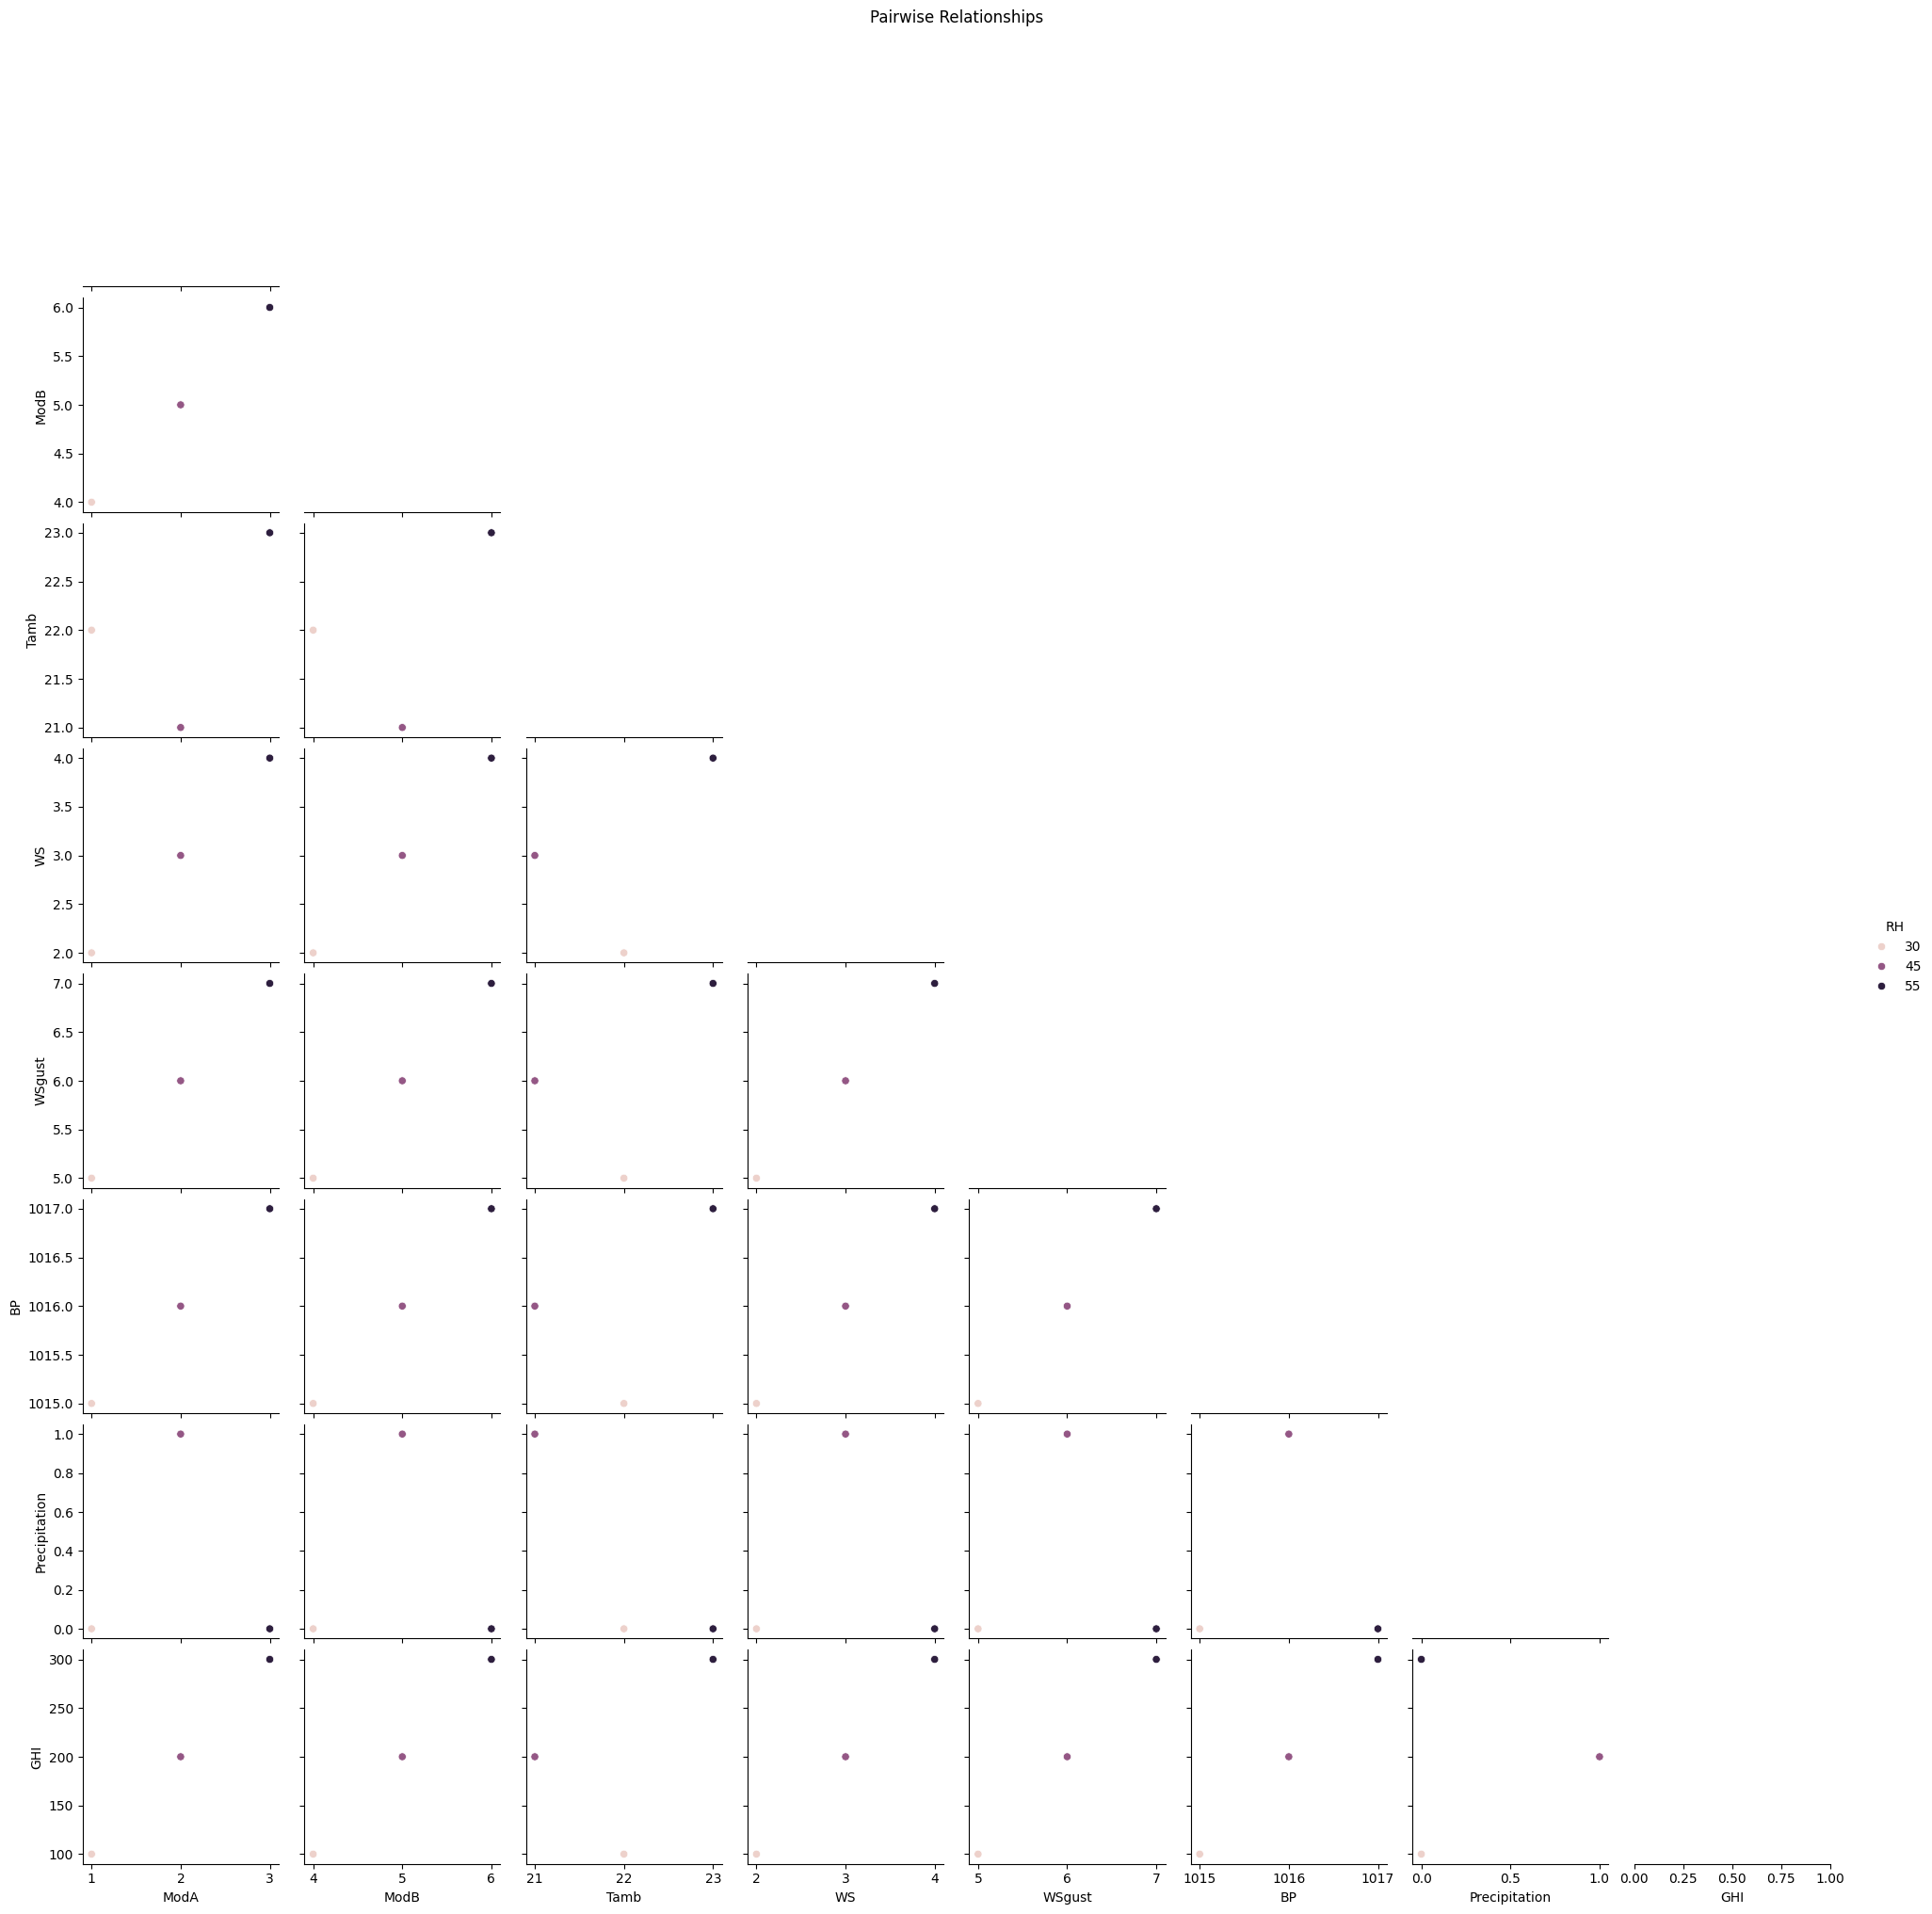

In [9]:
# Sample data creation (replace this with your actual dataset)
# Example: data = pd.read_csv('your_data.csv')
data = pd.DataFrame({
    'ModA': [1, 2, 3], 
    'ModB': [4, 5, 6], 
    'Tamb': [22, 21, 23],
    'RH': [30, 45, 55],
    'WS': [2, 3, 4],
    'WSgust': [5, 6, 7],
    'BP': [1015, 1016, 1017],
    'Precipitation': [0, 1, 0],
    'GHI': [100, 200, 300]
})

# Define the features for the pairplot
features = ['ModA', 'ModB', 'Tamb', 'RH', 'WS', 'WSgust', 'BP', 'Precipitation', 'GHI']
df = data[features]  # Create a new DataFrame 'df' from the selected features

# Create the pairplot
sns.pairplot(df, hue="RH", corner=True)  # Adjust 'hue' based on your interest
plt.suptitle("Pairwise Relationships", y=1.02)  # Adjust y for better title placement
plt.show()

### Thank you